In [36]:
import pandas as pd

In [37]:
file_path = '/Users/benasblaskevicius/Desktop/QBML25.csv'
df = pd.read_csv(file_path)


In [38]:
print(df.columns)

Index(['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att',
       'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Succ%', 'Lng', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds.1', 'Sk%', 'NY/A',
       'ANY/A', '4QC', 'GWD', 'Player-additional'],
      dtype='object')


In [39]:
df_sorted_by_age = df.sort_values(by='Age')

In [40]:
df_sorted_by_age.head()

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,Rate,QBR,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,Player-additional
48,49,Anthony Richardson,IND,21,QB,4,4,2-2-0,50,84,...,87.3,45.0,7,29,7.7,6.02,6.19,NaN,NaN,RichAn03
19,20,Bryce Young,CAR,22,QB,16,16,2-14-0,315,527,...,73.7,33.4,62,477,10.5,4.07,3.68,2.0,2.0,YounBr01
7,8,C.J. Stroud*,HOU,22,QB,15,15,9-6-0,319,499,...,100.8,57.5,38,331,7.1,7.03,7.47,1.0,3.0,StroCJ00
11,12,Sam Howell,WAS,23,QB,17,17,4-13-0,388,612,...,78.9,42.4,65,449,9.6,5.17,4.39,2.0,2.0,HoweSa00
43,44,Tyson Bagent,CHI,23,QB,5,4,2-2-0,94,143,...,71.4,51.8,5,35,3.4,5.57,4.15,NaN,NaN,BageTy00


In [41]:
youngest_qbs_with_most_tds = df_sorted_by_age.sort_values(by=['Age', 'TD'], ascending=[True, False])

In [42]:
print(youngest_qbs_with_most_tds[['Player', 'Age', 'TD']].head())

                Player  Age  TD
48  Anthony Richardson   21   3
7         C.J. Stroud*   22  23
19         Bryce Young   22  11
11          Sam Howell   23  21
43        Tyson Bagent   23   3


In [43]:
qbs_younger_than_25 = df_sorted_by_age[df_sorted_by_age['Age'] < 25]

qbs_younger_than_25_sorted_by_tds = qbs_younger_than_25.sort_values(by='TD', ascending=False)

print(qbs_younger_than_25_sorted_by_tds[['Player', 'Age', 'TD']].head())


             Player  Age  TD
4      Brock Purdy*   24  31
7      C.J. Stroud*   22  23
11       Sam Howell   23  21
9   Trevor Lawrence   24  21
21    Justin Fields   24  16


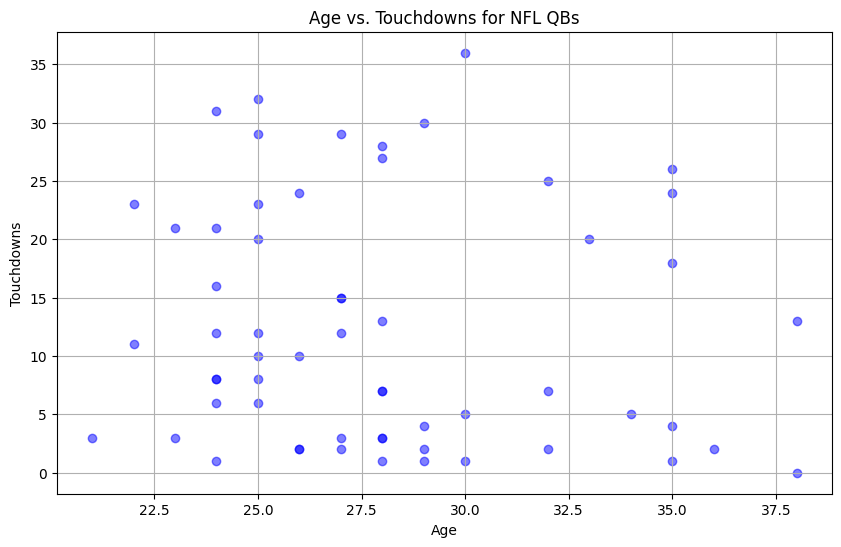

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['TD'], color='blue', alpha=0.5)
plt.title('Age vs. Touchdowns for NFL QBs')
plt.xlabel('Age')
plt.ylabel('Touchdowns')
plt.grid(True)
plt.show()


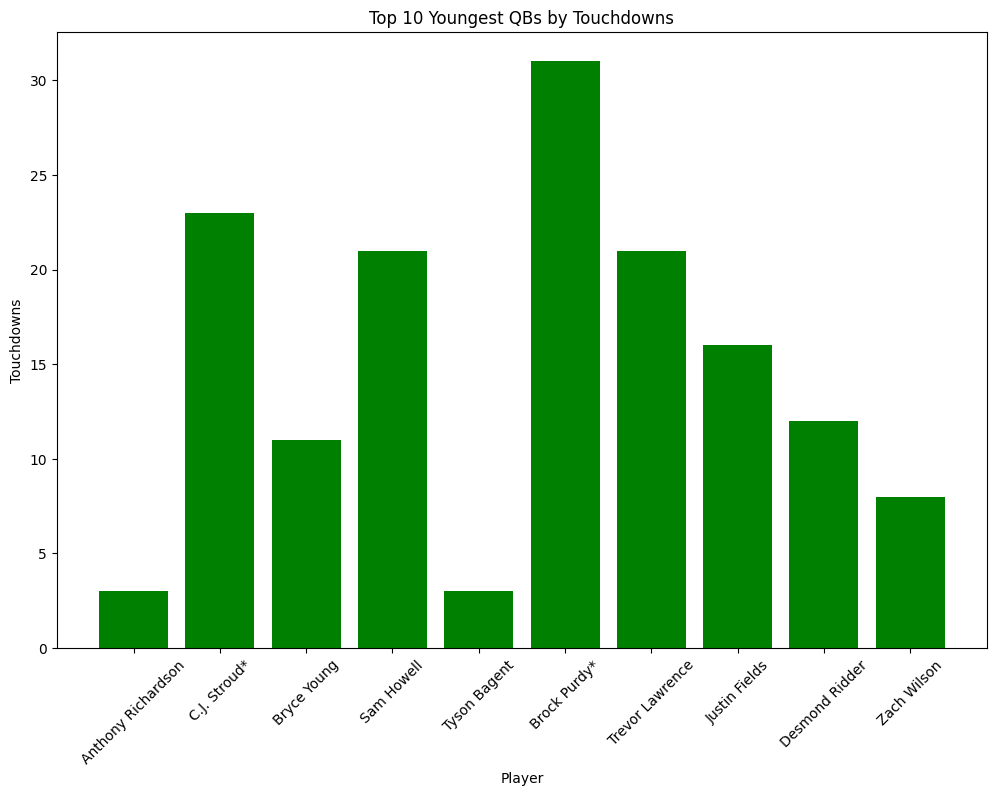

In [45]:
top_young_qbs = youngest_qbs_with_most_tds.head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_young_qbs['Player'], top_young_qbs['TD'], color='green')
plt.title('Top 10 Youngest QBs by Touchdowns')
plt.xlabel('Player')
plt.ylabel('Touchdowns')
plt.xticks(rotation=45)
plt.show()


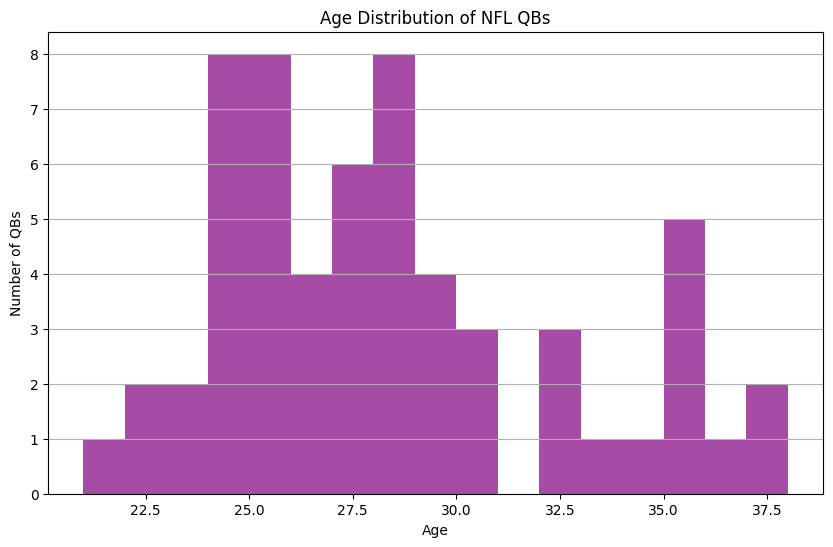

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=range(min(df['Age']), max(df['Age']) + 1), alpha=0.7, color='purple')
plt.title('Age Distribution of NFL QBs')
plt.xlabel('Age')
plt.ylabel('Number of QBs')
plt.grid(axis='y')
plt.show()


In [47]:
df_sorted_by_rate = df.sort_values(by='Rate', ascending=False)

In [48]:
df_sorted_by_rate = df_sorted_by_rate.reset_index(drop=True)
df_sorted_by_rate['Rank'] = df_sorted_by_rate.index + 1

In [49]:
df_sorted_by_rate['Rank'] = df_sorted_by_rate['Rate'].rank(method='min', ascending=False)

In [50]:
print(df_sorted_by_rate[['Rank', 'Player', 'Tm', 'Rate']].head())

   Rank           Player   Tm   Rate
0   1.0    Mason Rudolph  PIT  118.0
1   2.0     Brock Purdy*  SFO  113.0
2   3.0    Dak Prescott*  DAL  105.9
3   4.0     Kirk Cousins  MIN  103.8
4   5.0  Lamar Jackson*+  BAL  102.7


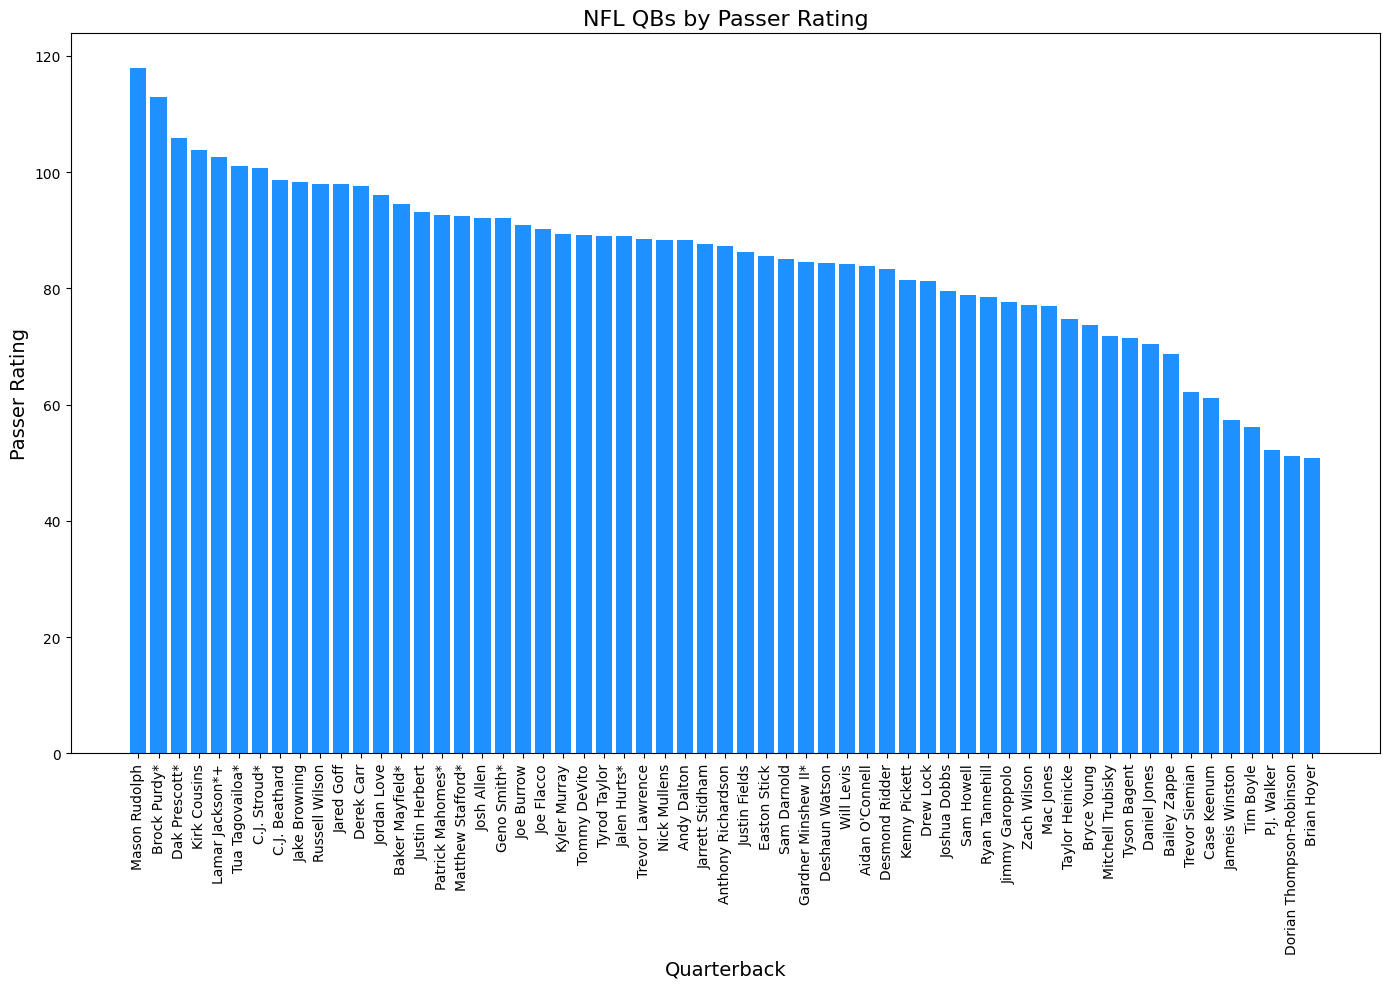

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10)) 

plt.bar(df_sorted_by_rate['Player'], df_sorted_by_rate['Rate'], color='dodgerblue')

plt.title('NFL QBs by Passer Rating', fontsize=16)
plt.xlabel('Quarterback', fontsize=14)
plt.ylabel('Passer Rating', fontsize=14)
plt.xticks(rotation=90) 

plt.tight_layout() 
plt.show()


In [52]:
df_sorted_by_int = df.sort_values(by='Int', ascending=True) 

In [53]:
df_sorted_by_int = df_sorted_by_int.reset_index(drop=True)


In [54]:
df_sorted_by_int['Int_Rank'] = df_sorted_by_int.index + 1


In [55]:
df_sorted_by_int_desc = df.sort_values(by='Int', ascending=False)  # False for descending order
df_sorted_by_int_desc = df_sorted_by_int_desc.reset_index(drop=True)
df_sorted_by_int_desc['Int_Rank_Desc'] = df_sorted_by_int_desc.index + 1
df_sorted_by_int_desc['Int_Rank_Desc'] = df_sorted_by_int_desc['Int'].rank(method='min', ascending=False)

In [56]:
print(df_sorted_by_int_desc[['Int_Rank_Desc', 'Player', 'Int']])

    Int_Rank_Desc                    Player  Int
0             1.0                Sam Howell   21
1             2.0                Josh Allen   18
2             3.0              Jalen Hurts*   15
3             4.0          Patrick Mahomes*   14
4             4.0           Trevor Lawrence   14
5             4.0           Tua Tagovailoa*   14
6             7.0                Jared Goff   12
7             7.0            Desmond Ridder   12
8             7.0                 Mac Jones   12
9            10.0         Matthew Stafford*   11
10           10.0               Jordan Love   11
11           10.0              Brock Purdy*   11
12           13.0               Bryce Young   10
13           13.0           Baker Mayfield*   10
14           13.0              Joshua Dobbs   10
15           16.0             Dak Prescott*    9
16           16.0              Bailey Zappe    9
17           16.0               Geno Smith*    9
18           16.0           Jimmy Garoppolo    9
19           16.0   

In [57]:
import plotly.io as pio
pio.renderers.default = "notebook"


In [58]:
pio.renderers.default = "notebook_connected"


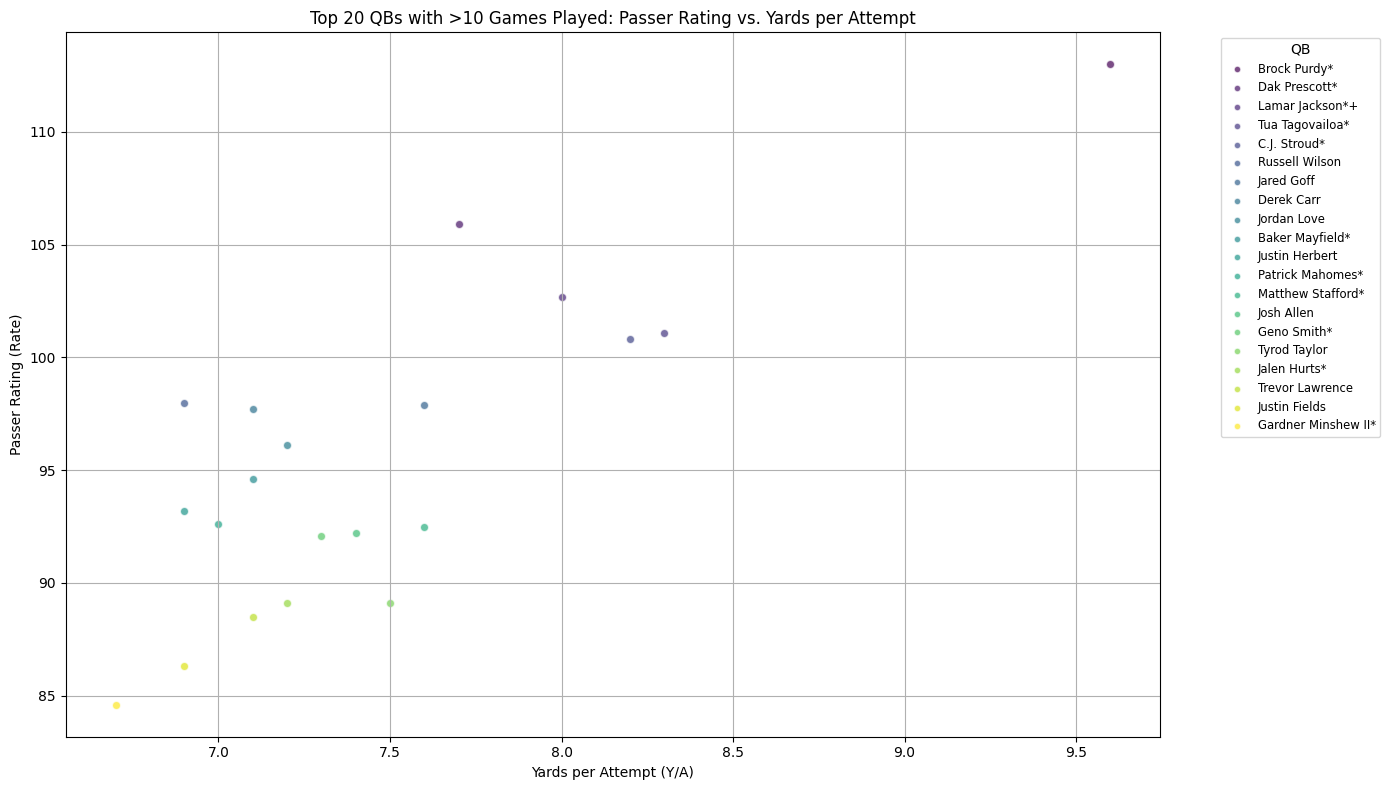

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sample DataFrame creation for demonstration purposes
# Assuming 'df' already contains 'Player', 'Y/A', 'Rate', and 'G' (games played) columns

# Filter the DataFrame to include only QBs who played more than 10 games
df_filtered = df[df['G'] > 10]

# Focus on the top N QBs based on 'Rate' from the filtered DataFrame
top_n_qbs_filtered = df_filtered.sort_values(by='Rate', ascending=False).head(20)  # Adjust N here

# Generate a unique color for each of the top N QBs
colors = plt.cm.viridis(np.linspace(0, 1, len(top_n_qbs_filtered['Player'].unique())))

plt.figure(figsize=(14, 8))

# Scatter plot, coloring each point by QB
for (player, ya, rate), color in zip(top_n_qbs_filtered[['Player', 'Y/A', 'Rate']].values, colors):
    plt.scatter(ya, rate, color=color, label=player, alpha=0.7, edgecolors='w')

plt.title('Top 20 QBs with >10 Games Played: Passer Rating vs. Yards per Attempt')
plt.xlabel('Yards per Attempt (Y/A)')
plt.ylabel('Passer Rating (Rate)')
plt.grid(True)

# Due to potentially large number of QBs, you might choose to omit the legend or handle it differently
plt.legend(title='QB', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', markerscale=0.8)

plt.tight_layout()
plt.show()



/var/folders/c1/sb_1fbzd1xl9j3_6znzkrl_00000gn/T/ipykernel_9143/3045979326.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




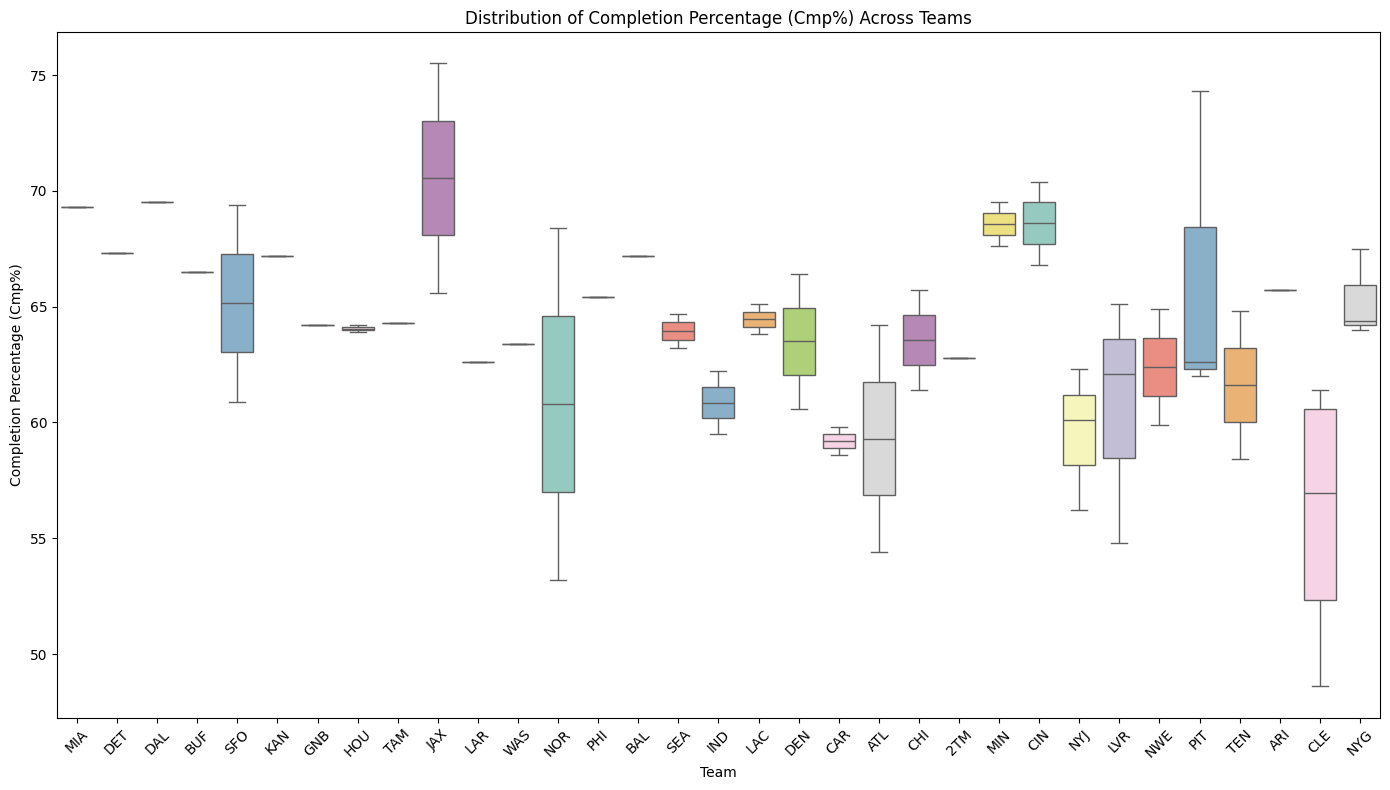

In [62]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Tm', y='Cmp%', palette='Set3')
plt.title('Distribution of Completion Percentage (Cmp%) Across Teams')
plt.xlabel('Team')
plt.ylabel('Completion Percentage (Cmp%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:
features = ['Cmp', 'Att', 'Cmp%', 'TD', 'Int']
X = df[features]
y = df['Yds'] 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = model.predict(X_test)


In [67]:
rmse = mean_squared_error(y_test, y_pred, squared=False)


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [68]:
rmse, model.coef_, model.intercept_


(141.74500488632435,
 array([ 4.45039491,  2.25776408,  0.67069342, 44.17168774,  0.71060054]),
 -19.50424781800939)

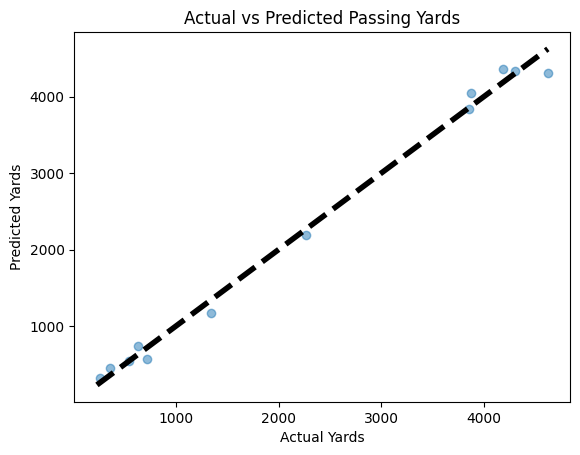

In [69]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Passing Yards')
plt.xlabel('Actual Yards')
plt.ylabel('Predicted Yards')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

In [79]:
# Correcting the alignment issue
# Ensure qb_names is aligned with X_test's indices, which should also align with y_test and y_pred
qb_names_test = df.loc[X_test.index, 'Player'].reset_index(drop=True)

# Assuming y_test and y_pred are pandas Series with indexes that may not align directly with qb_names_test
# Reset the index for y_test to align by numerical index
y_test_reset = y_test.reset_index(drop=True)

# Create the DataFrame using aligned data
results = pd.DataFrame({
    'QB': player,
    'Actual Yards': y_test_reset,  # Now aligned
    'Predicted Yards': y_pred  # Assuming this is a numpy array or a list aligned with y_test
})


In [85]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'df' is your DataFrame containing the QB data

# Selecting the features and the target variable
features = ['Cmp', 'Att', 'Cmp%', 'TD', 'Int']
X = df[features]
y = df['Yds']  # Assuming 'Yds' is the column for actual passing yards

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the entire dataset
model.fit(X, y)

# Make predictions for the entire dataset
y_pred = model.predict(X)

# Create a DataFrame with QB names, actual, and predicted values
results = pd.DataFrame({
    'QB': df['Player'],  # Assuming there's a 'Player' column with QB names
    'Actual Yards': y,
    'Predicted Yards': y_pred
})

# Optionally, sort the DataFrame by actual yards to highlight the highest yardages
results_sorted = results.sort_values(by='Actual Yards', ascending=False)

# Display the sorted results
print(results_sorted)






                          QB  Actual Yards  Predicted Yards
0            Tua Tagovailoa*          4624      4306.231870
1                 Jared Goff          4575      4533.952281
2              Dak Prescott*          4516      4777.772217
3                 Josh Allen          4306      4337.536188
4               Brock Purdy*          4280      3782.189059
5           Patrick Mahomes*          4183      4357.626491
6                Jordan Love          4159      4409.207135
7               C.J. Stroud*          4108      3591.895445
8            Baker Mayfield*          4044      4166.697350
9            Trevor Lawrence          4016      3880.509428
10         Matthew Stafford*          3965      3719.951121
11                Sam Howell          3946      4072.433759
12                Derek Carr          3878      4041.078329
13              Jalen Hurts*          3858      3831.671625
14           Lamar Jackson*+          3678      3492.202121
15               Geno Smith*          36

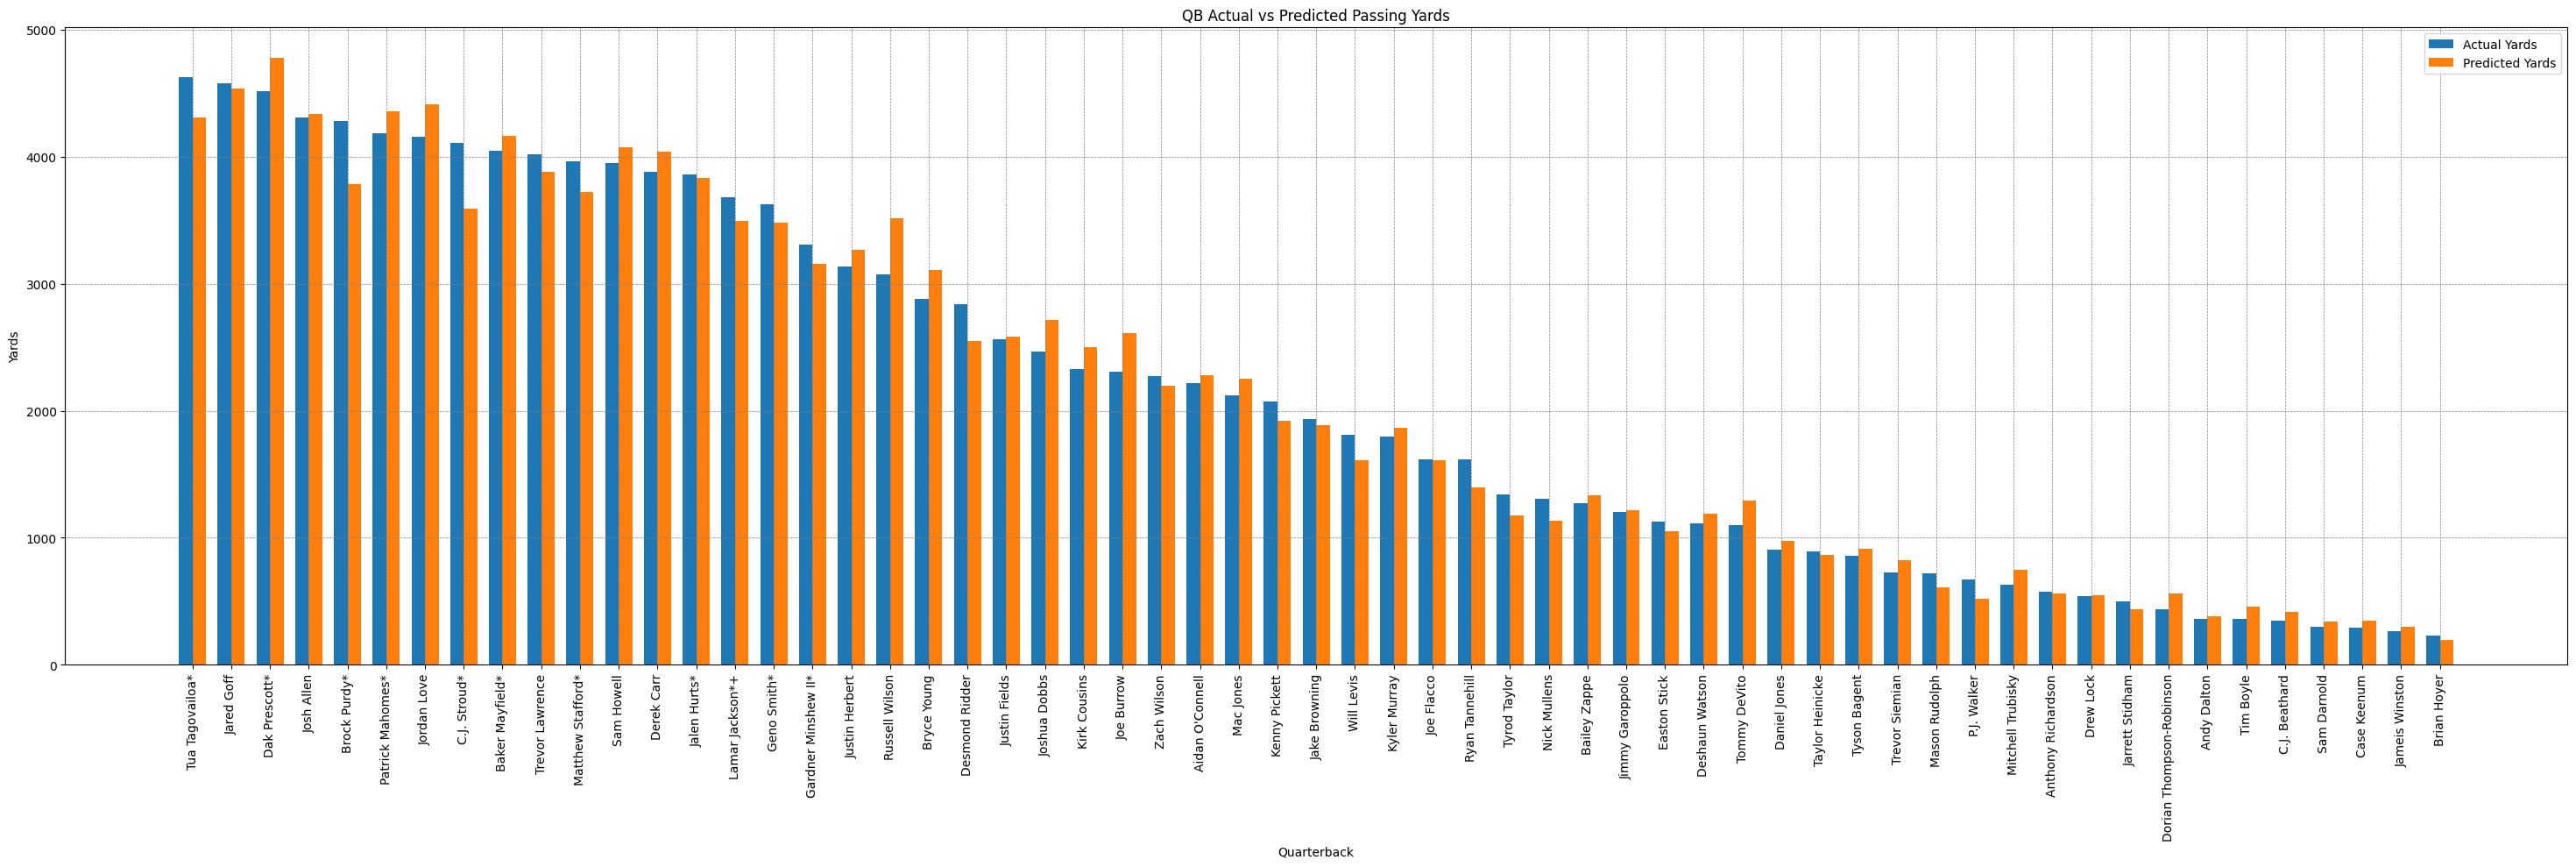

In [86]:
import matplotlib.pyplot as plt

# Assuming 'results_sorted' is your DataFrame containing all QBs, sorted in a meaningful way for visualization

# Creating the bar chart for every QB
n_qbs = len(results_sorted)  # Number of QBs in your dataset
ind = range(n_qbs)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(0.5 * n_qbs, 10))  # Adjusting figure size based on the number of QBs
actual_bars = ax.bar(ind, results_sorted['Actual Yards'], width, label='Actual Yards')
pred_bars = ax.bar([p + width for p in ind], results_sorted['Predicted Yards'], width, label='Predicted Yards')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Quarterback')
ax.set_ylabel('Yards')
ax.set_title('QB Actual vs Predicted Passing Yards')
ax.set_xticks([p + width / 2 for p in ind])
ax.set_xticklabels(results_sorted['QB'], rotation=90)  # Rotate labels to fit
ax.legend()

# Adding a legend and a grid for better readability
ax.legend(loc='upper right')
ax.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

# Show the plot
plt.tight_layout()
plt.show()

